# Rを用いたアンケートデータとID-POSデータのハンドリング

## アンケートデータのハンドリング方法

- strによるデータフレームの変数の型の確認
- factorと引数levelsを用いた度数0のカテゴリの確保
- subsetを用いた条件に合致するデータの抽出
- orderによるデータフレームのソート
- read.csvの引数na.stringsや関数na.omitによる欠損値の処理
- mergeを用いたデータフレームの併合
- whichによる数値の置き換え
- readLinesによる固定帳ファイルの読み込み、substringによる文字列抽出、データフレームへの変換

## ID-POSデータのハンドリング方法

- lapplyを用いた複数のデータファイルの一括読み込み
- orderを用いたRFM分析
- tableやxtabsによるクロス集計表の作成
- tapplyによる様々な条件で顧客IDごとの購買金額の取得
- 自作関数とapplyを併用した顧客IDごとの購買商品名の取得
- 顧客ID別の来店間隔の分布の描画および要約統計量の算出

### 変数の型

- strによるデータ構造の把握
- factorの使いどころ

In [1]:
#データの読み込み
jinji_hyouka <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/jinji_hyouka.csv")

#ラベルの文字コードが統一されていないとRの結果がjupyter形式で出力されないため、変数名を半角英数字に変更
colnames(jinji_hyouka) <- c("ID", "sex", "dep", "age", "cooperativeness", 
                            "self-assertion", "skill", "knowledge", "stress", "total", "last_year_total")

In [2]:
#データフレームの構造の表示
str(jinji_hyouka)

'data.frame':	800 obs. of  11 variables:
 $ ID             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex            : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 1 2 2 2 ...
 $ dep            : Factor w/ 2 levels "A部","B部": 1 2 1 1 1 1 2 1 1 1 ...
 $ age            : Factor w/ 3 levels "若手","熟練",..: 3 2 3 2 1 2 1 1 1 3 ...
 $ cooperativeness: int  70 45 54 51 56 51 64 47 62 50 ...
 $ self-assertion : int  45 62 70 63 52 64 65 77 76 77 ...
 $ skill          : int  65 51 55 53 44 48 58 54 74 53 ...
 $ knowledge      : int  71 72 70 65 68 73 72 59 82 74 ...
 $ stress         : int  53 64 61 60 56 52 45 68 55 66 ...
 $ total          : int  251 227 249 232 217 236 256 237 294 254 ...
 $ last_year_total: int  248 211 242 240 177 216 262 215 314 234 ...


In [3]:
#変数の追加
jinji_hyouka$total_mean <- apply(jinji_hyouka[, 10:11], 1, mean)    #totalとlast_year_totalの平均の値を新変数に追加
str(jinji_hyouka)    #total_meanが追加されている

'data.frame':	800 obs. of  12 variables:
 $ ID             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex            : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 1 2 2 2 ...
 $ dep            : Factor w/ 2 levels "A部","B部": 1 2 1 1 1 1 2 1 1 1 ...
 $ age            : Factor w/ 3 levels "若手","熟練",..: 3 2 3 2 1 2 1 1 1 3 ...
 $ cooperativeness: int  70 45 54 51 56 51 64 47 62 50 ...
 $ self-assertion : int  45 62 70 63 52 64 65 77 76 77 ...
 $ skill          : int  65 51 55 53 44 48 58 54 74 53 ...
 $ knowledge      : int  71 72 70 65 68 73 72 59 82 74 ...
 $ stress         : int  53 64 61 60 56 52 45 68 55 66 ...
 $ total          : int  251 227 249 232 217 236 256 237 294 254 ...
 $ last_year_total: int  248 211 242 240 177 216 262 215 314 234 ...
 $ total_mean     : num  250 219 246 236 197 ...


#### Factor型(因子型)とは?

- 変数が数値の対応づけられた文字データで構成されているデータ型
- 因子型はベクトルや行列などと同じデータ構造
- データフレーム内の文字列は特に指定が無ければ因子型で表現
- 因子型の変数に含まれる文字はR内では整数型としても認識

### factorの使いどころ

度数が0のカテゴリを表示したいときに有用

In [4]:
#度数分布表の生成
score <- c(1, 5, 2, 10, 8, 2, 1, 4, 3, 3)
table(score)    #factor型ではない変数の場合、度数が0のカテゴリは表示されない

score
 1  2  3  4  5  8 10 
 2  2  2  1  1  1  1 

In [5]:
#factor型の変換と度数分布表
fscore <- factor(score, levels=seq(0, 10, 1)) #factor(vector, levels=水準ベクトル)、levelsに指定したベクトルは文字列扱いになる
str(fscore)

table(fscore)

 Factor w/ 11 levels "0","1","2","3",..: 2 6 3 11 9 3 2 5 4 4


fscore
 0  1  2  3  4  5  6  7  8  9 10 
 0  2  2  2  1  1  0  0  1  0  1 

In [6]:
#==, != を用いた条件抽出

#男性のデータのみ抽出
mdat <- subset(jinji_hyouka, sex=="M")    #subset(data.frame, 条件式(arg=...ではないので注意))
head(mdat)

#否定(!)を用いたデータ抽出
mdat2 <- subset(jinji_hyouka, sex!="F")
head(mdat2)

,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
1,1,M,A部,中堅,70,45,65,71,53,251,248,249.5
3,3,M,A部,中堅,54,70,55,70,61,249,242,245.5
4,4,M,A部,熟練,51,63,53,65,60,232,240,236.0
6,6,M,A部,熟練,51,64,48,73,52,236,216,226.0
8,8,M,A部,若手,47,77,54,59,68,237,215,226.0
9,9,M,A部,若手,62,76,74,82,55,294,314,304.0


,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
1,1,M,A部,中堅,70,45,65,71,53,251,248,249.5
3,3,M,A部,中堅,54,70,55,70,61,249,242,245.5
4,4,M,A部,熟練,51,63,53,65,60,232,240,236.0
6,6,M,A部,熟練,51,64,48,73,52,236,216,226.0
8,8,M,A部,若手,47,77,54,59,68,237,215,226.0
9,9,M,A部,若手,62,76,74,82,55,294,314,304.0


In [7]:
#<, <=, >, >= を用いた条件抽出

cope1 <- subset(jinji_hyouka, cooperativeness < 50)    #協調性50未満のデータ
head(cope1)

cope2 <- subset(jinji_hyouka, cooperativeness <= 50)    #協調性50以下のデータ 
head(cope2)

cope3 <- subset(jinji_hyouka, cooperativeness > 50)    #協調性50より大きいデータ
head(cope3)

cope4 <- subset(jinji_hyouka, cooperativeness >= 50)    #協調性50以上のデータ
head(cope4)

,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
2,2,F,B部,熟練,45,62,51,72,64,227,211,219.0
8,8,M,A部,若手,47,77,54,59,68,237,215,226.0
13,13,M,B部,熟練,43,60,47,57,57,207,202,204.5
16,16,M,A部,若手,47,74,48,66,57,235,246,240.5
18,18,M,A部,若手,34,57,36,42,57,169,188,178.5
19,19,F,B部,熟練,34,36,25,42,52,134,161,147.5


,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
2,2,F,B部,熟練,45,62,51,72,64,227,211,219.0
8,8,M,A部,若手,47,77,54,59,68,237,215,226.0
10,10,M,A部,中堅,50,77,53,74,66,254,234,244.0
13,13,M,B部,熟練,43,60,47,57,57,207,202,204.5
16,16,M,A部,若手,47,74,48,66,57,235,246,240.5
18,18,M,A部,若手,34,57,36,42,57,169,188,178.5


,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
1,1,M,A部,中堅,70,45,65,71,53,251,248,249.5
3,3,M,A部,中堅,54,70,55,70,61,249,242,245.5
4,4,M,A部,熟練,51,63,53,65,60,232,240,236.0
5,5,F,A部,若手,56,52,44,68,56,217,177,197.0
6,6,M,A部,熟練,51,64,48,73,52,236,216,226.0
7,7,F,B部,若手,64,65,58,72,45,256,262,259.0


,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
1,1,M,A部,中堅,70,45,65,71,53,251,248,249.5
3,3,M,A部,中堅,54,70,55,70,61,249,242,245.5
4,4,M,A部,熟練,51,63,53,65,60,232,240,236.0
5,5,F,A部,若手,56,52,44,68,56,217,177,197.0
6,6,M,A部,熟練,51,64,48,73,52,236,216,226.0
7,7,F,B部,若手,64,65,58,72,45,256,262,259.0


In [8]:
# 論理和(|)と論理積(&)を用いたデータ抽出

m1 <- subset(jinji_hyouka, (sex == "M")|(age == "熟練"))                   #男性or熟練のデータ
head(m1)

m2 <- subset(jinji_hyouka, (sex == "M")&(age == "熟練")&(skill >= 50))    #男性で熟練で技能50以上
head(m2)

m3 <- subset(jinji_hyouka, (sex == "M")&(age == "中堅")|(age == "熟練"))  #男性中堅or男性熟練
head(m2)

,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
1,1,M,A部,中堅,70,45,65,71,53,251,248,249.5
2,2,F,B部,熟練,45,62,51,72,64,227,211,219.0
3,3,M,A部,中堅,54,70,55,70,61,249,242,245.5
4,4,M,A部,熟練,51,63,53,65,60,232,240,236.0
6,6,M,A部,熟練,51,64,48,73,52,236,216,226.0
8,8,M,A部,若手,47,77,54,59,68,237,215,226.0


,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
4,4,M,A部,熟練,51,63,53,65,60,232,240,236.0
50,50,M,A部,熟練,64,66,60,66,47,256,260,258.0
94,94,M,B部,熟練,65,51,64,78,51,258,218,238.0
97,97,M,A部,熟練,35,53,51,60,63,199,186,192.5
144,144,M,B部,熟練,50,50,50,58,54,208,216,212.0
188,188,M,B部,熟練,45,74,79,64,64,262,291,276.5


,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
4,4,M,A部,熟練,51,63,53,65,60,232,240,236.0
50,50,M,A部,熟練,64,66,60,66,47,256,260,258.0
94,94,M,B部,熟練,65,51,64,78,51,258,218,238.0
97,97,M,A部,熟練,35,53,51,60,63,199,186,192.5
144,144,M,B部,熟練,50,50,50,58,54,208,216,212.0
188,188,M,B部,熟練,45,74,79,64,64,262,291,276.5


In [9]:
#subsetを利用しない行の抽出
cond <- (jinji_hyouka$sex == "M")&((jinji_hyouka$age == "中堅")|(jinji_hyouka$age == "熟練"))   
head(cond)    #condは論理値ベクトル

head(jinji_hyouka[cond, ])

[1]  TRUE FALSE  TRUE  TRUE FALSE  TRUE

,ID,sex,dep,age,cooperativeness,self-assertion,skill,knowledge,stress,total,last_year_total,total_mean
1,1,M,A部,中堅,70,45,65,71,53,251,248,249.5
3,3,M,A部,中堅,54,70,55,70,61,249,242,245.5
4,4,M,A部,熟練,51,63,53,65,60,232,240,236.0
6,6,M,A部,熟練,51,64,48,73,52,236,216,226.0
10,10,M,A部,中堅,50,77,53,74,66,254,234,244.0
13,13,M,B部,熟練,43,60,47,57,57,207,202,204.5


### 欠損値の処理

In [10]:
#欠損値がNAのデータ(githubからデータ読み込み)
kesson <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/missing_data.csv")
head(kesson)

#欠損値が極値のデータ
kesson2 <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/missing_data2.csv")
kesson2    #999, 9999は普通の数値として認識されてしまう

ID,A,B,C,D
1,5,31,95,23
2,NA,23,73,33
3,23,35,43,54
4,3,45,8,NA


ID,A,B,C,D
1,5,31,95,23
2,999,23,73,33
3,23,35,43,54
4,3,45,8,9999


In [11]:
#欠損値の指定(指定した値を欠損値へ変換)

#データ読み込み時に引数na.stringsで指定した値を欠損値に変換
kesson3 <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/missing_data2.csv", na.strings = c(999, 9999))
kesson3

ID,A,B,C,D
1,5,31,95,23
2,NA,23,73,33
3,23,35,43,54
4,3,45,8,NA


In [12]:
#na.omit()を用いた欠損値があるデータ行の削除

kanzen <- na.omit(kesson3)
kanzen

,ID,A,B,C,D
1,1,5,31,95,23
3,3,23,35,43,54


In [13]:
#complete.cases()を用いた欠損の無いデータ行の抽出

cind <- complete.cases(kesson3)
cind    #返り値は論理値ベクトル

kanzen2 <- kesson3[cind,]
kanzen2    #na.omit()と同様のデータが得られる

[1]  TRUE FALSE  TRUE FALSE

,ID,A,B,C,D
1,1,5,31,95,23
3,3,23,35,43,54


### ソート

In [14]:
#1変数のソート

score <- c(1,5,2,10,8,2,1,4,3,3)
sort(score, decreasing=FALSE)    #sort(vec, 降順=T or F)

[1]  1  1  2  2  3  3  4  5  8 10

#### 多変量データ全体のソート

In [15]:
#サンプルデータの読み込み
sdat <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/sort_data.csv")
sdat

部署,協調性,ストレス,総合
1,30,40,10
3,25,10,50
2,50,20,20
1,40,40,30
2,20,30,40
2,10,20,40
3,20,10,30


In [16]:
#orderによるソートされた行番号の取得

#order(ソートしたい変数, decreasing=FALSE)
posi <- order(sdat$協調性)                      #協調性を昇順にソート
posi                                            #返り値は行番号

posi2 <- order(sdat$協調性, decreasing=TRUE)    #協調性を降順にソート
posi2

[1] 6 5 7 2 1 4 3

[1] 3 4 1 2 5 7 6

In [17]:
sdat[posi, ]     #昇順の場合
sdat[posi2, ]    #降順の場合

,部署,協調性,ストレス,総合
6,2,10,20,40
5,2,20,30,40
7,3,20,10,30
2,3,25,10,50
1,1,30,40,10
4,1,40,40,30
3,2,50,20,20


,部署,協調性,ストレス,総合
3,2,50,20,20
4,1,40,40,30
1,1,30,40,10
2,3,25,10,50
5,2,20,30,40
7,3,20,10,30
6,2,10,20,40


### マージ

2つのデータフレームを横に併合する

In [18]:
datA <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/merge_data_A.csv")  #行数8
datB <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/merge_data_B.csv")  #行数4
datA
datB

ID,質問A,質問B
1,3,1
2,3,5
3,2,6
4,0,7
5,1,3
6,4,3
7,4,7
8,4,3


ID,質問C,質問D
1,30,100
3,20,60
5,10,30
7,40,70


In [19]:
#2つのデータフレームのマージ
merge(datA, datB, by="ID")    #merge(df1, df2, by="両方のデータに含まれる変数の名前")

ID,質問A,質問B,質問C,質問D
1,3,1,30,100
3,2,6,20,60
5,1,3,10,30
7,4,7,40,70


In [20]:
#欠損のあるデータ行も残すマージ
merge(datA, datB, by="ID", all=TRUE)    #all=TRUEで片方のデータにしか存在しないデータ行も含めたマージを行う  

ID,質問A,質問B,質問C,質問D
1,3,1,30,100
2,3,5,NA,NA
3,2,6,20,60
4,0,7,NA,NA
5,1,3,10,30
6,4,3,NA,NA
7,4,7,40,70
8,4,3,NA,NA


### 数値の置き換え

In [21]:
#サンプルデータの生成
vec <- c(2,3,4,5,1,2,3,1,2)
tmat <- matrix(vec, ncol=3)
tmat

2,5,3
3,1,1
4,2,2


In [22]:
#関数whichを用いた置換対象要素の座標取得

loc2 <- which(tmat == 2, arr.ind=TRUE)    #2が収められている行と列を行列形式(arr.ind=TRUE)で取得
loc4 <- which(tmat == 4, arr.ind=TRUE)    #4が収められている行と列を行列形式(arr.ind=TRUE)で取得
loc2

row,col
1,1
3,2
3,3


In [23]:
#数値の置換

#置換する前に元データのコピーを残しておくこと
tmatc <- tmat

#tmatの4がある座標に対して2を代入する
tmatc[loc4] <- 2

#tmatの2がある座標に対して4を代入する
tmatc[loc2] <- 4

tmat     #置換前
tmatc    #置換後

2,5,3
3,1,1
4,2,2


4,5,3
3,1,1
2,4,4


### 固定長データのハンドリング

#### 固定長データとは?
- 各行が必ず同じ桁数になるように作成されたデータで、桁の位置によって変数の位置を表現
- 区切り文字を含まないので、区切り文字分のメモリを節約できるメリット
- 生データから変数を生成するのにやや手間がかかる

In [24]:
#固定長データの読み込み

#readLinesで読み込み
itemresp <- readLines("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/item_response_fixed_length.txt")
itemresp    #ID○○○○(6桁)と数値(1桁)×5の合計11行のデータ

[1] "ID000142414" "ID000211111" "ID000314144" "ID000434413" "ID000532112"

In [25]:
#変数の位置情報の生成

spoint <- c(1, seq(7, 11, 1))    #始点の生成
epoint <- c(6, seq(7, 11, 1))    #終点の生成
spoint                           
epoint  

[1]  1  7  8  9 10 11

[1]  6  7  8  9 10 11

In [26]:
#変数の作成
raw0 <- sapply(itemresp, substring, spoint, epoint)    #sapply(list_vec, 各要素に適用したい関数, 適用関数の引数,...)
raw0                                                   #sapplyは属性(名前)のついた行列で返す(1要素につき列方向に値が返ってくる) 

ID000142414,ID000211111,ID000314144,ID000434413,ID000532112
ID0001,ID0002,ID0003,ID0004,ID0005
4,1,1,3,3
2,1,4,4,2
4,1,1,4,1
1,1,4,1,1
4,1,4,3,2


In [27]:
#行列の整形の前の確認
dimnames(raw0)           #行名がNULL, 列名がデータの要素になっている
class(dimnames(raw0))    #行名と列名を含んだリストデータ(listの要素を指定する場合は[[(数値)]])とする

[[1]]
NULL

[[2]]
[1] "ID000142414" "ID000211111" "ID000314144" "ID000434413" "ID000532112"

[1] "list"

In [28]:
#行列の整形
dimnames(raw0)[[2]] <- 1:5    #ID~~となっている列名の変数名を1~5に変更(リストデータの場合の列名確認はdimnamesで行う)
raw1 <- t(raw0)              #行と列を転置し、行方向にあるID番号を列方向に並べる(列名・行名も転置される)
raw1
colnames(raw1) <- c("ID", paste0("問", 1:5))    #列名を変更
raw1

1,ID0001,4,2,4,1,4
2,ID0002,1,1,1,1,1
3,ID0003,1,4,1,4,4
4,ID0004,3,4,4,1,3
5,ID0005,3,2,1,1,2


,ID,問1,問2,問3,問4,問5
1,ID0001,4,2,4,1,4
2,ID0002,1,1,1,1,1
3,ID0003,1,4,1,4,4
4,ID0004,3,4,4,1,3
5,ID0005,3,2,1,1,2


In [29]:
#正誤データへの変換

#答えの番号を記載したデータ
key <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/key.txt")    
str(key)    #5×1のデータフレーム(列名は「正答」)

#正解を1, 不正解を0に変換

#sweep(データフレーム, 演算を適用する方向(1:行 or 2:列), 演算対象のvec,演算内容)
binmat <- sweep(raw1[, -1], 2, key[, 1], FUN= "==")*1    #論理演算で論理値行列になっているので*1で数値変換
binmat

'data.frame':	5 obs. of  1 variable:
 $ 正答: int  2 1 4 1 1


,問1,問2,問3,問4,問5
1,0,0,1,1,0
2,0,1,0,1,1
3,0,0,0,0,0
4,0,0,1,1,0
5,0,0,0,1,0


## ID-POSデータのハンドリング

### ID-POSデータの特徴
- 購買商品単位で記録されており、同じ顧客IDがデータ内で複数存在する

In [30]:
#ID-POSデータの例
pos0 <- read.csv("https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/POS_dir/201301.csv")
head(pos0, 3)

顧客ID,店舗,購買日,購買時間,商品カテゴリ,購買金額
ID00001,B,20130108,15.60,C4,322
ID00002,B,20130101,17.60,C25,320
ID00002,B,20130110,17.71,C1,383


In [31]:
#変数の型の確認
str(pos0)

'data.frame':	96 obs. of  6 variables:
 $ 顧客ID      : Factor w/ 33 levels "ID00001","ID00002",..: 1 2 2 2 3 3 3 3 3 4 ...
 $ 店舗        : Factor w/ 3 levels "A","B","C": 2 2 2 2 3 3 1 1 2 3 ...
 $ 購買日      : int  20130108 20130101 20130110 20130131 20130102 20130111 20130112 20130119 20130128 20130123 ...
 $ 購買時間    : num  15.6 17.6 17.7 15.6 17.2 ...
 $ 商品カテゴリ: Factor w/ 30 levels "C1","C10","C11",..: 25 18 1 18 6 17 10 17 6 18 ...
 $ 購買金額    : int  322 320 383 222 365 445 306 337 303 429 ...


### 複数のデータを一度に読み込むための前準備

In [32]:
#ファイル名のベクトルを生成

#基本URL
base_url <- "https://raw.githubusercontent.com/gndb3168/Renshu_data/master/R_MA/Sec_02/POS_dir/"    

#1~9月と10~12月のファイル名ベクトルを生成し結合
file_name1 <- paste0("20130",1:9)
file_name2 <- paste0("2013",10:12)
file_name <- c(file_name1, file_name2)

#拡張子
file_extension <- ".csv"

#基本URL,ファイル名,拡張子の結合
fname <- paste0(base_url, file_name, file_extension)

In [33]:
#複数のデータを一度に読み込む(データフレームのリストを生成)

#複数のデータフレームを同時に扱う際は文字列はfactor型にせず、そのまま読み込むこと
tmp <- lapply(fname, read.csv, stringsAsFactors=FALSE)    #lapplyはリストを返す変数

#### <span style="color:red">ID-POSデータでの注意事項(文字列の扱い)</span>

データフレーム内の文字列はfactor型として扱われて整数値が付与されるが、異なるファイルに同一IDのデータがあった場合にデータフレーム間で異なる整数値が付与される現象が起こってしまう。  
複数のデータフレームをfactor型のまま統合すると想定外のミスを誘発する可能性があるので、読み込む際は"stringsAsFactors=FALSE"で文字列としてデータを読み込み、全データを併合してからfactor型に変換した方が良い。

In [34]:
#複数のデータフレームを縦につなげる
posall <- do.call(rbind, tmp)    #do.call(適用関数, リストオブジェクト)はリスト形式のオブジェクトに対して関数を適用する

#### 補足:do.callとlapplyの違い

lapplyは1リスト単位で関数を実行し、処理結果を1つずつリストにして返す。  
そのため、rbindのような1つのデータとして集約したい場合には向いていない。  
(今回の12個(12か月分)のID-POSデータをlapplyでrbindしようとしても12個のリストが返ってくるだけ(笑))

参考:[What's the difference between lapply and do.call?
](https://stackoverflow.com/questions/10801750/whats-the-difference-between-lapply-and-do-call)

In [35]:
#Factor型への変換
locv <- c("顧客ID", "店舗", "商品カテゴリ")
posall[, locv] <- lapply(posall[, locv], as.factor)
str(posall[, locv])

'data.frame':	1000 obs. of  3 variables:
 $ 顧客ID      : Factor w/ 36 levels "ID00001","ID00002",..: 1 2 2 2 3 3 3 3 3 4 ...
 $ 店舗        : Factor w/ 3 levels "A","B","C": 2 2 2 2 3 3 1 1 2 3 ...
 $ 商品カテゴリ: Factor w/ 30 levels "C1","C10","C11",..: 25 18 1 18 6 17 10 17 6 18 ...


### 複数の変数のソート

In [36]:
#顧客ID>購買日>購買時間でのソート

tmploc <- order(posall$顧客ID, posall$購買日, posall$購買時間)
pos <- posall[tmploc,]
head(pos)

,顧客ID,店舗,購買日,購買時間,商品カテゴリ,購買金額
1,ID00001,B,20130108,15.60,C4,322
97,ID00001,B,20130202,14.61,C28,332
98,ID00001,A,20130204,18.29,C1,254
99,ID00001,B,20130219,17.14,C27,385
188,ID00001,C,20130320,17.39,C1,406
256,ID00001,C,20130407,18.38,C30,289


### RFM分析
顧客の優良性を評価するための分析。

- R:recency(最新購買日)
- F:frequency(総購買回数)
- M:monetary(総購買金額)

In [37]:
#RFM分析

#顧客IDごとの最新購買日
R <- tapply(posall$購買日, posall$顧客ID, max)
#顧客IDごとの総購買回数
F <- tapply(posall$顧客ID, posall$顧客ID, length)
#顧客IDごとの総購買金額
M <- tapply(posall$購買金額, posall$顧客ID, sum)

#RFMをデータフレームとして統合
rfm <- data.frame(R=R, F=F, M=M)

# M>F>Rで降順にソート
tmploc2 <- order(rfm$M, rfm$F, rfm$R, decreasing=TRUE)
rfm2 <- rfm[tmploc2, ]

#上位20%以内の顧客の表示
nrow(rfm2)*0.2    #36*0.2 = 7.2
rfm2[1:7, ]

[1] 7.2

,R,F,M
ID00002,20131231,37,11436
ID00019,20131218,38,11246
ID00020,20131231,35,11045
ID00005,20131230,33,10743
ID00017,20131219,34,10590
ID00028,20131223,34,10295
ID00027,20131213,32,10078


### ID-POSデータにおけるクロス集計表
クロス集計表で度数を求める際は度数0のカテゴリが表示されるように、文字列のカテゴリをfactor型に変換してから分析すること(読み込み時は文字列)

In [38]:
#全体
t1 <- table(posall$顧客ID, posall$商品カテゴリ)

#店舗別(3店舗)
t2 <- xtabs(~顧客ID+商品カテゴリ+店舗, data=posall)

#購買日別(336日)
t3 <- xtabs(~顧客ID+商品カテゴリ+購買日, data=posall)

In [39]:
#factor型のデータは度数0のカテゴリもしっかり表示される
dim(table(posall[, c("顧客ID", "商品カテゴリ")]))

#店舗Aにおけるクロス集計表の行列と列数を求める
storeA <- subset(posall, 店舗=="A")
dim(table(storeA[, c("顧客ID", "商品カテゴリ")]))

[1] 36 30

[1] 36 30

### 顧客ID別に月ごとの購買金額の取得

In [40]:
cid <- posall$顧客ID                  #顧客IDベクトル
buym <- substr(posall$購買日, 1, 6)   #購買月のベクトル

#引数をlist形式で与えることで2つの変数ごとに関数を適用させる
resmat <- tapply(posall$購買金額, list(cid, buym), sum)

#NAのデータに対し0を代入
resmat[is.na(resmat)] <- 0
head(resmat, 3)

,201301,201302,201303,201304,201305,201306,201307,201308,201309,201310,201311,201312
ID00001,322,971,406,704,556,645,328,901,815,609,386,383
ID00002,925,321,420,1317,1318,317,1642,1517,427,1786,339,1107
ID00003,1756,348,287,0,516,552,334,965,0,345,594,1606


### 顧客ID別に商品名を取得する

In [41]:
#1顧客IDと承認カテゴリのクロス表に対し、1個以上購入した商品カテゴリの名前を取得
getitemname <- function(x) {
    return(names(which(x >= 1)))
}

#上記の関数を顧客ID別に適用
res2 <- apply(t1, 1, getitemname)
head(res2, 2)    #商品カテゴリの順番がバラバラなことに注意

$ID00001
 [1] "C1"  "C12" "C14" "C15" "C18" "C20" "C22" "C23" "C24" "C27" "C28" "C29"
[13] "C3"  "C30" "C4" 

$ID00002
 [1] "C1"  "C13" "C14" "C15" "C16" "C18" "C19" "C2"  "C20" "C22" "C24" "C25"
[13] "C27" "C28" "C29" "C3"  "C30" "C4"  "C6"  "C7"  "C9"

### 顧客IDごとに来店間隔の分布を描画・要約

In [42]:
#来店日をdate形式に変換

#yyyymmddの整数形式の日付データを文字列"yyyy-mm--dd"に変換する
tmpdate <- paste0(substr(posall$購買日, 1, 4), "-",
                substr(posall$購買日, 5, 6), "-",
                substr(posall$購買日,7, 8))
head(tmpdate)

#文字列"yyyy-mm--dd"をdate形式に変換
ndate <- as.Date(tmpdate)

#顧客別に来店感覚を求める
restime <- tapply(ndate, posall$顧客ID, diff)
head(restime, 2)

[1] "2013-01-08" "2013-01-01" "2013-01-10" "2013-01-31" "2013-01-02"
[6] "2013-01-11"

$ID00001
Time differences in days
 [1] 25  2 15 29 18  3 12 10 18 22  2 22 37 14  5 13  3  0 27 12 26 26

$ID00002
Time differences in days
 [1]  9 21 26  2  7  8 18 11  1  1 19  4  1 12  7 14 29  1  5  6  9 16  3  0 10
[26] 31  2  6  9  8  4 24 12 15  2 11


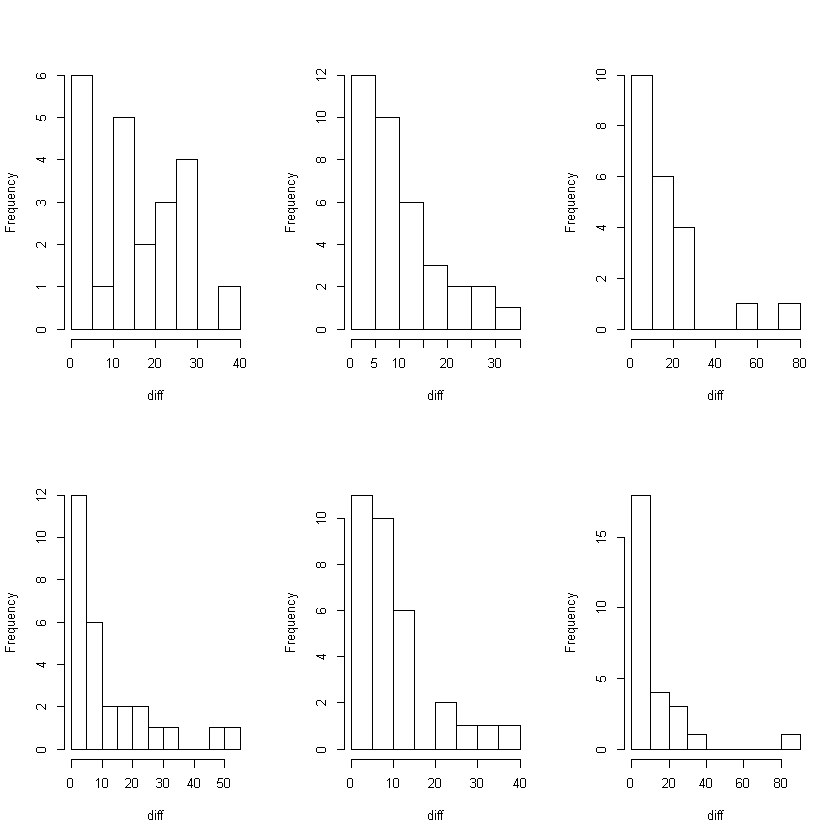

In [43]:
#顧客別に来店間隔の分布を描画

#histgramは数値データを対象にしているので、'difftime num'データを数値化しておく
restime2 <- lapply(restime, as.numeric)    #restimeはリスト形式のデータなのでlapplyでリスとリスト毎に関数を適用させる

#直後にコードで表示させるグラフを2行3列で表示されるように指定
par(mfrow=c(2, 3))
#lapplyでhistを実行すると余計な実行結果が返ってくるのでinvisible()で図だけ表示されるようにする
invisible(lapply(restime2[1:6], hist, breaks=10, xlab="diff", main=""))

参考:[How to stop hist from printing all the information into the console
](https://stackoverflow.com/questions/42847872/how-to-stop-hist-from-printing-all-the-information-into-the-console)

In [44]:
#顧客別に来店間隔の分布を要約するための前準備

#describe関数で要約するのに必要なpsychパッケージの呼び出し
library(psych)    

In [45]:
#describe関数で要約
resd <- lapply(restime2, describe)
resd[1:2]

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,22,15.5,10.40947,14.5,15.16667,14.826,0,37,37,0.1488231,-1.115132,2.219307
,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,36,10.11111,8.331619,8.5,9.2,8.1543,0,31,31,0.8929718,-0.1021857,1.388603
